In [5]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
from keras.models import Sequential
from keras.optimizers import Adam

import numpy as np
import pandas as pd

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import matplotlib
from matplotlib import pyplot as plt

import os
import glob
import random
from skimage.io import imread
from random import choice

directory_path = '/Users/sri.voora/Desktop/gfg'

tumor_images = glob.glob(os.path.join(directory_path, '**', '*.png'), recursive=True)

class0 = []
class1 = []

for filename in tumor_images:
    base_filename = os.path.basename(filename)
    
    if "class0" in base_filename:
        class0.append(filename)
    elif "class1" in base_filename:
        class1.append(filename)

print("Class 0:", len(class0))
print("Class 1:", len(class1))

Class 0: 1
Class 1: 1
/Users/sri.voora/Desktop/gfg/1class0.png


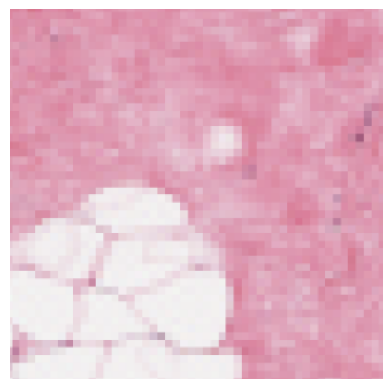

In [7]:
random_image = imread(class0[0])

plt.imshow(random_image.astype(np.uint8))
plt.axis('off')
plt.show()

In [8]:
batch_size = 32

img_height = 180 
img_width = 180

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  './16896',
  validation_split=0.2, 
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  './16896',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

NotFoundError: Could not find directory ./16896

In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])